<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

# Chapter 3

In [12]:
import numpy as np
import matplotlib.pyplot as plt

legs = np.array([ 35. ,  36.5,  38. ,  39.5,  41. ,  42.5,  44. ,  45.5,  47. ,
        48.5,  50. ,  51.5,  53. ,  54.5,  56. ,  57.5,  59. ,  60.5,
        62. ,  63.5,  65. ])

heights = np.array([ 145.75166215,  154.81989548,  147.45149903,  154.53270424,
        166.17450311,  171.45325818,  149.44608871,  164.73275841,
        168.82025028,  171.32607675,  182.07638078,  188.37513159,
        188.08738789,  196.95181717,  192.85162151,  201.60765816,
        210.66135402,  202.06143758,  215.72224422,  207.04958807,
        215.8394592 ])

In [8]:
# import the sklearn class LinearRegression and initialize the model
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=False)

# Prepare the measured data arrays and fit the model to them
legs = legs.reshape(len(legs), 1)
heights = heights.reshape(len(heights), 1)
model.fit(legs, heights)

# Use the fitted model to make a prediction for the found femur
fossil_leg = np.array(50.7).reshape(1,1)
fossil_height = model.predict(fossil_leg)
print("Predicted fossil height = {:0.2f} cm".format(fossil_height[0,0]))

Predicted fossil height = 181.34 cm


In [14]:
years = np.array([[ 1970.],
       [ 1971.],
       [ 1972.],
       [ 1973.],
       [ 1974.],
       [ 1975.],
       [ 1976.],
       [ 1977.],
       [ 1978.],
       [ 1979.],
       [ 1980.],
       [ 1981.],
       [ 1982.],
       [ 1983.],
       [ 1984.],
       [ 1985.],
       [ 1986.],
       [ 1987.],
       [ 1988.],
       [ 1989.],
       [ 1990.],
       [ 1991.],
       [ 1992.],
       [ 1993.],
       [ 1994.],
       [ 1995.],
       [ 1996.],
       [ 1997.],
       [ 1998.],
       [ 1999.],
       [ 2000.],
       [ 2001.],
       [ 2002.],
       [ 2003.],
       [ 2004.],
       [ 2005.],
       [ 2006.],
       [ 2007.],
       [ 2008.],
       [ 2009.],
       [ 2010.],
       [ 2011.],
       [ 2012.],
       [ 2013.]])

levels = np.array([[ 4.67716535],
       [ 4.88188976],
       [ 5.24015748],
       [ 5.003937  ],
       [ 5.47244094],
       [ 5.40944881],
       [ 5.37007873],
       [ 5.3031496 ],
       [ 5.55511811],
       [ 5.36220472],
       [ 5.59842519],
       [ 6.08661417],
       [ 5.85826771],
       [ 6.18897637],
       [ 6.1535433 ],
       [ 5.74803149],
       [ 5.77165354],
       [ 5.79527558],
       [ 5.98031495],
       [ 6.15748031],
       [ 6.23228346],
       [ 6.33464566],
       [ 6.35826771],
       [ 6.29133858],
       [ 6.49999999],
       [ 6.61811023],
       [ 6.78740157],
       [ 7.06692913],
       [ 6.66535432],
       [ 7.01181102],
       [ 7.06299212],
       [ 7.28740157],
       [ 7.38188976],
       [ 7.75984251],
       [ 7.74015747],
       [ 7.74409448],
       [ 7.91732283],
       [ 7.99606298],
       [ 8.35039369],
       [ 8.58661416],
       [ 8.90157479],
       [ 8.96456692],
       [ 9.32677164],
       [ 8.98031495]])


from matplotlib.ticker import MultipleLocator

def plot_data_and_forecast(years, levels, years_forecast, levels_forecast):
    """
    Purpose:
        Over-plot the forecast data with the measured data used to fit the model
    Args:
        years (np.array): independent ("x") variable of measured data set
        levels (np.array): dependent ("y") variable of measured data set
        years_forecast (np.array): independent ("x") variable of forecast/modeled data
        levels_forecast (np.array): dependent ("y") variable of forecast/modeled data
    Returns:
        fig (matplotlib.figure): matplotlib figure object containing the plot
    """
    font_options = {'family': 'Arial', 'size': 16}
    plt.rc('font', **font_options)
    fig, axis = plt.subplots(figsize=(8,4))
    axis.plot(years, levels, color="black", linestyle=" ", marker="o", label='Data')
    axis.plot(years_forecast, levels_forecast, marker=".", color="red", label='Forecast')
    axis.grid(True, which="both")
    axis.axhline(0, color="black")
    axis.axvline(0, color="black")
    axis.xaxis.set_major_locator(MultipleLocator(50.0))
    axis.xaxis.set_minor_locator(MultipleLocator(10.0))
    axis.yaxis.set_major_locator(MultipleLocator(5.0))
    axis.yaxis.set_minor_locator(MultipleLocator(1.0))
    axis.set_ylim([0, 20])
    axis.set_xlim([1965, 2105])
    axis.set_ylabel('Sea Level Change (inches)')
    axis.set_xlabel('Time (years)')
    axis.set_title("Global Average Sea Level Change")
    axis.legend()
    plt.show()
    return fig

Prediction: year = 2100, level = 16.66


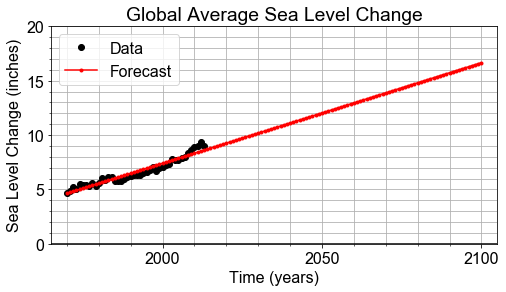

In [15]:
# Import LinearRegression class, build a model, fit to the data
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
model.fit(years, levels)

# Use model to make a prediction for one year, 2100
future_year = 2100
future_level = model.predict(np.array([[future_year]]))
print("Prediction: year = {}, level = {:.02f}".format(future_year, future_level[0,0]))

# Use model to predict for many years, and over-plot with measured data
years_forecast = np.linspace(1970, 2100, 131).reshape(-1, 1)
levels_forecast = model.predict(years_forecast)
fig = plot_data_and_forecast(years, levels, years_forecast, levels_forecast)

In [19]:
from statsmodels.formula.api import ols
from io import StringIO
import pandas as pd

df_str = ',distances,names,velocities\n0,0.032,SMC,170\n1,0.034,LMC,290\n2,0.275,NGC-221,-185\n3,0.275,NGC-224,-220\n4,0.263,NGC-598,-70\n5,1.1,NGC-1055,450\n6,1.0,NGC-1068,920\n7,0.9,NGC-3031,-30\n8,0.9,NGC-3627,650\n9,1.7,NGC-4151,960\n10,0.8,NGC-4214,300\n11,1.4,NGC-4258,500\n12,2.0,NGC-4382,500\n13,0.63,NGC-4449,200\n14,2.0,NGC-4472,850\n15,2.0,NGC-4486,800\n16,2.0,NGC-4649,1090\n17,0.5,NGC-4736,290\n18,0.9,NGC-4826,150\n19,0.5,NGC-5194,270\n20,0.9,NGC-5236,500\n21,0.45,NGC-5357,200\n22,0.214,NGC-6822,-130\n23,1.1,NGC-7331,500\n'
df = pd.read_csv(StringIO(df_str), index_col=0)
df.head()

,distances,names,velocities
0,0.032,SMC,170
1,0.034,LMC,290
2,0.275,NGC-221,-185
3,0.275,NGC-224,-220
4,0.263,NGC-598,-70


In [25]:
# Fit the model, based on the form of the formula
model_fit = ols(formula="velocities ~ distances", data=df).fit()

# Extract the model parameters and associated "errors" or uncertainties
a0 = model_fit.params['Intercept']
a1 = model_fit.params['distances']
e0 = model_fit.bse['Intercept']
e1 = model_fit.bse['distances']

# Print the results
print('For slope a1={:.02f}, the uncertainty in a1 is {:.02f}'.format(a1, e1))
print('For intercept a0={:.02f}, the uncertainty in a0 is {:.02f}'.format(a0, e0))

For slope a1=454.16, the uncertainty in a1 is 75.24
For intercept a0=-40.78, the uncertainty in a0 is 83.44


In [33]:
df_monthly_str = 'Date,Open,High,Low,Close,Adj Close,Volume,Jday,DayCount\n2013-01-01,13104.299805,13969.990234,13104.299805,13860.580078,13860.580078,2786680000,2456293.5,1827.0\n2013-02-01,13860.580078,14149.150391,13784.009766,14054.490234,14054.490234,2487580000,2456324.5,1858.0\n2013-03-01,14054.490234,14585.099609,13937.599609,14578.540038999998,14578.540038999998,2546320000,2456352.5,1886.0\n2013-04-01,14578.540038999998,14887.509766,14434.429688,14839.799805,14839.799805,2920230000,2456383.5,1917.0\n2013-05-01,14839.799805,15542.400391,14687.049805,15115.570313,15115.570313,2771510000,2456413.5,1947.0\n2013-06-01,15123.549805,15340.089844,14551.269531,14909.599609,14909.599609,2929040000,2456444.5,1978.0\n2013-07-01,14911.599609,15634.320313,14858.929688,15499.540038999998,15499.540038999998,2623130000,2456474.5,2008.0\n2013-08-01,15503.849609,15658.429688,14760.410156,14810.30957,14810.30957,2327660000,2456505.5,2039.0\n2013-09-01,14801.549805,15709.580078,14777.480469,15129.669922,15129.669922,2371540000,2456536.5,2070.0\n2013-10-01,15132.490234,15721.0,14719.429688,15545.75,15545.75,2206620000,2456566.5,2100.0\n2013-11-01,15558.009766,16174.509766,15522.179688,16086.410156,16086.410156,1820260000,2456597.5,2131.0\n2013-12-01,16087.120116999999,16588.25,15703.790038999998,16576.660156,16576.660156,2057160000,2456627.5,2161.0\n2014-01-01,16572.169922,16573.070313,15617.549805,15698.849609,15698.849609,2177040000,2456658.5,2192.0\n2014-02-01,15697.69043,16398.949219,15340.69043,16321.709961000002,16321.709961000002,2067820000,2456689.5,2223.0\n2014-03-01,16321.709961000002,16505.699219,16046.990234,16457.660156,16457.660156,2095940000,2456717.5,2251.0\n2014-04-01,16458.050781,16631.630859,16015.320313,16580.839844,16580.839844,1986960000,2456748.5,2282.0\n2014-05-01,16580.259766,16735.509766,16341.299805,16717.169922,16717.169922,1643160000,2456778.5,2312.0\n2014-06-01,16716.849609,16978.019531,16673.650391,16826.599609,16826.599609,1755480000,2456809.5,2343.0\n2014-07-01,16828.529297,17151.560547,16563.300781,16563.300781,16563.300781,1690880000,2456839.5,2373.0\n2014-08-01,16561.699219,17153.800781,16333.780272999998,17098.449219,17098.449219,1482600000,2456870.5,2404.0\n2014-09-01,17097.419922,17350.640625,16934.429688,17042.900391,17042.900391,1870550000,2456901.5,2435.0\n2014-10-01,17040.460938,17395.539063,15855.120116999999,17390.519531,17390.519531,2903240000,2456931.5,2465.0\n2014-11-01,17390.900391,17894.830078,17278.359375,17828.240234,17828.240234,1516490000,2456962.5,2496.0\n2014-12-01,17827.269531,18103.449219,17067.589844,17823.070313,17823.070313,2216900000,2456992.5,2526.0\n'
df_daily_str = 'Date,Open,High,Low,Close,Adj Close,Volume,Jday,DayCount\n2013-01-02,13104.299805,13412.709961,13104.299805,13412.549805,13412.549805,161430000,2456294.5,1827.0\n2013-01-03,13413.009766,13430.599609,13358.299805,13391.360352,13391.360352,129630000,2456295.5,1828.0\n2013-01-04,13391.049805,13447.110352000002,13376.230469,13435.209961000002,13435.209961000002,107590000,2456296.5,1829.0\n2013-01-07,13436.129883000001,13436.129883000001,13343.320313,13384.290039,13384.290039,113120000,2456299.5,1832.0\n2013-01-08,13377.419922,13377.419922,13293.129883,13328.849609,13328.849609,129570000,2456300.5,1833.0\n2013-01-09,13329.919922,13416.549805,13329.080078,13390.509766,13390.509766,123070000,2456301.5,1834.0\n2013-01-10,13391.820313,13478.200195,13382.290039,13471.219727000002,13471.219727000002,133520000,2456302.5,1835.0\n2013-01-11,13471.450195,13496.679688,13439.969727000002,13488.429688,13488.429688,119200000,2456303.5,1836.0\n2013-01-14,13488.429688,13520.179688,13459.839844,13507.320313,13507.320313,118460000,2456306.5,1839.0\n2013-01-15,13507.320313,13546.370116999999,13445.799805,13534.889647999998,13534.889647999998,102280000,2456307.5,1840.0\n2013-01-16,13534.889647999998,13534.889647999998,13468.959961000002,13511.230469,13511.230469,118540000,2456308.5,1841.0\n2013-01-17,13511.230469,13633.889647999998,13510.240234,13596.019531,13596.019531,183900000,2456309.5,1842.0\n2013-01-18,13596.019531,13649.929688,13571.860352000002,13649.700195,13649.700195,260900000,2456310.5,1843.0\n2013-01-22,13649.700195,13712.209961000002,13622.959961000002,13712.209961000002,13712.209961000002,144300000,2456314.5,1847.0\n2013-01-23,13712.209961000002,13794.290038999998,13710.129883000001,13779.330078,13779.330078,104490000,2456315.5,1848.0\n2013-01-24,13779.330078,13879.660156,13779.330078,13825.330078,13825.330078,124780000,2456316.5,1849.0\n2013-01-25,13825.330078,13895.980469,13825.330078,13895.980469,13895.980469,130300000,2456317.5,1850.0\n2013-01-28,13895.980469,13915.719727000002,13862.570313,13881.929688,13881.929688,113570000,2456320.5,1853.0\n2013-01-29,13881.929688,13969.990234,13880.009766,13954.419922,13954.419922,108230000,2456321.5,1854.0\n2013-01-30,13954.419922,13966.129883000001,13896.950195,13910.419922,13910.419922,117200000,2456322.5,1855.0\n2013-01-31,13910.419922,13941.05957,13860.580078,13860.580078,13860.580078,142600000,2456323.5,1856.0\n2013-02-01,13860.580078,14019.780272999998,13860.580078,14009.790038999998,14009.790038999998,128420000,2456324.5,1857.0\n2013-02-04,14009.790038999998,14009.790038999998,13866.830078,13880.080078,13880.080078,130420000,2456327.5,1860.0\n2013-02-05,13880.080078,14013.599609,13880.080078,13979.299805,13979.299805,134390000,2456328.5,1861.0\n2013-02-06,13979.299805,13991.610352000002,13913.179688,13986.519531,13986.519531,127560000,2456329.5,1862.0\n2013-02-07,13986.519531,13988.05957,13852.200195,13944.049805,13944.049805,118530000,2456330.5,1863.0\n2013-02-08,13944.049805,14022.620116999999,13944.049805,13992.969727000002,13992.969727000002,99860000,2456331.5,1864.0\n2013-02-11,13992.969727000002,13992.969727000002,13940.410156,13971.240234,13971.240234,75090000,2456334.5,1867.0\n2013-02-12,13971.240234,14038.969727000002,13968.94043,14018.700195,14018.700195,117180000,2456335.5,1868.0\n2013-02-13,14018.700195,14029.349609,13945.780272999998,13982.910156,13982.910156,130520000,2456336.5,1869.0\n2013-02-14,13982.910156,13990.360352000002,13921.94043,13973.389647999998,13973.389647999998,114800000,2456337.5,1870.0\n2013-02-15,13973.389647999998,14001.929688,13906.730469,13981.759766,13981.759766,195670000,2456338.5,1871.0\n2013-02-19,13981.759766,14044.820313,13977.900391,14035.669922,14035.669922,136410000,2456342.5,1875.0\n2013-02-20,14035.669922,14058.269531,13919.280272999998,13927.540038999998,13927.540038999998,138540000,2456343.5,1876.0\n2013-02-21,13927.540038999998,13927.540038999998,13834.400391,13880.620116999999,13880.620116999999,131410000,2456344.5,1877.0\n2013-02-22,13880.620116999999,14001.19043,13880.620116999999,14000.570313,14000.570313,139850000,2456345.5,1878.0\n2013-02-25,14000.570313,14081.580078,13784.009766,13784.169922,13784.169922,152190000,2456348.5,1881.0\n2013-02-26,13784.169922,13918.44043,13784.169922,13900.129883000001,13900.129883000001,132580000,2456349.5,1882.0\n2013-02-27,13900.129883000001,14104.860352000002,13880.19043,14075.370116999999,14075.370116999999,107010000,2456350.5,1883.0\n2013-02-28,14075.370116999999,14149.150391,14050.179688,14054.490234,14054.490234,177150000,2456351.5,1884.0\n2013-03-01,14054.490234,14107.089844,13937.599609,14089.660156,14089.660156,125920000,2456352.5,1885.0\n2013-03-04,14089.660156,14128.209961000002,14030.370116999999,14127.820313,14127.820313,110810000,2456355.5,1888.0\n2013-03-05,14127.820313,14286.370116999999,14127.820313,14253.769531,14253.769531,112100000,2456356.5,1889.0\n2013-03-06,14253.769531,14320.650391,14253.0,14296.240234,14296.240234,116510000,2456357.5,1890.0\n2013-03-07,14296.240234,14354.69043,14296.240234,14329.490234,14329.490234,117080000,2456358.5,1891.0\n2013-03-08,14329.490234,14413.169922,14329.490234,14397.070313,14397.070313,115630000,2456359.5,1892.0\n2013-03-11,14397.070313,14448.05957,14373.320313,14447.290038999998,14447.290038999998,94880000,2456362.5,1895.0\n2013-03-12,14447.290038999998,14478.799805,14412.05957,14450.05957,14450.05957,102100000,2456363.5,1896.0\n2013-03-13,14450.05957,14472.799805,14411.660156,14455.280272999998,14455.280272999998,83920000,2456364.5,1897.0\n2013-03-14,14455.280272999998,14539.290038999998,14455.280272999998,14539.139647999998,14539.139647999998,117390000,2456365.5,1898.0\n2013-03-15,14539.139647999998,14539.139647999998,14470.5,14514.110352000002,14514.110352000002,407770000,2456366.5,1899.0\n2013-03-18,14514.110352000002,14521.589844,14404.209961000002,14452.05957,14452.05957,119640000,2456369.5,1902.0\n2013-03-19,14452.05957,14514.339844,14382.089844,14455.820313,14455.820313,122170000,2456370.5,1903.0\n2013-03-20,14455.820313,14546.820313,14455.820313,14511.730469,14511.730469,121240000,2456371.5,1904.0\n2013-03-21,14511.730469,14511.730469,14383.019531,14421.490234,14421.490234,110450000,2456372.5,1905.0\n2013-03-22,14421.490234,14519.950195,14421.490234,14512.030272999998,14512.030272999998,101450000,2456373.5,1906.0\n2013-03-25,14512.030272999998,14563.75,14395.0,14447.75,14447.75,124840000,2456376.5,1909.0\n2013-03-26,14447.75,14561.540038999998,14447.75,14559.650391,14559.650391,96030000,2456377.5,1910.0\n2013-03-27,14559.650391,14559.650391,14439.549805,14526.160156,14526.160156,92680000,2456378.5,1911.0\n2013-03-28,14526.160156,14585.099609,14520.860352000002,14578.540038999998,14578.540038999998,153710000,2456379.5,1912.0\n2013-04-01,14578.540038999998,14605.719727000002,14531.480469,14572.849609,14572.849609,91400000,2456383.5,1916.0\n2013-04-02,14572.849609,14684.490234,14572.849609,14662.009766,14662.009766,98420000,2456384.5,1917.0\n2013-04-03,14662.009766,14683.129883000001,14525.360352000002,14550.349609,14550.349609,127140000,2456385.5,1918.0\n2013-04-04,14550.349609,14625.240234,14538.719727000002,14606.110352000002,14606.110352000002,104790000,2456386.5,1919.0\n2013-04-05,14606.110352000002,14606.110352000002,14434.429688,14565.25,14565.25,131250000,2456387.5,1920.0\n2013-04-08,14565.25,14613.480469,14497.799805,14613.480469,14613.480469,106680000,2456390.5,1923.0\n2013-04-09,14613.480469,14716.459961000002,14598.5,14673.459961000002,14673.459961000002,128580000,2456391.5,1924.0\n2013-04-10,14673.459961000002,14826.660156,14673.459961000002,14802.240234,14802.240234,120520000,2456392.5,1925.0\n2013-04-11,14802.240234,14887.509766,14785.360352000002,14865.139647999998,14865.139647999998,144570000,2456393.5,1926.0\n2013-04-12,14865.139647999998,14865.209961000002,14790.570313,14865.05957,14865.05957,119570000,2456394.5,1927.0\n2013-04-15,14865.05957,14865.05957,14598.580078,14599.200195,14599.200195,161680000,2456397.5,1930.0\n2013-04-16,14599.200195,14761.730469,14599.200195,14756.780272999998,14756.780272999998,126320000,2456398.5,1931.0\n2013-04-17,14756.780272999998,14756.780272999998,14560.80957,14618.589844,14618.589844,168010000,2456399.5,1932.0\n2013-04-18,14618.589844,14650.259766,14495.290038999998,14537.139647999998,14537.139647999998,158050000,2456400.5,1933.0\n2013-04-19,14537.139647999998,14553.730469,14444.030272999998,14547.509766,14547.509766,207200000,2456401.5,1934.0\n2013-04-22,14547.509766,14588.830078,14457.599609,14567.169922,14567.169922,146890000,2456404.5,1937.0\n2013-04-23,14567.169922,14721.419922,14554.290038999998,14719.459961000002,14719.459961000002,137320000,2456405.5,1938.0\n2013-04-24,14719.459961000002,14747.419922,14666.540038999998,14676.299805,14676.299805,138020000,2456406.5,1939.0\n2013-04-25,14676.299805,14768.049805,14665.450195,14700.799805,14700.799805,129600000,2456407.5,1940.0\n2013-04-26,14700.799805,14743.490234,14684.820313,14712.549805,14712.549805,128910000,2456408.5,1941.0\n2013-04-29,14712.549805,14844.959961000002,14712.549805,14818.75,14818.75,97060000,2456411.5,1944.0\n2013-04-30,14818.75,14839.799805,14734.469727000002,14839.799805,14839.799805,148250000,2456412.5,1945.0\n2013-05-01,14839.799805,14839.799805,14687.049805,14700.950195,14700.950195,112620000,2456413.5,1946.0\n2013-05-02,14700.950195,14834.629883000001,14700.950195,14831.580078,14831.580078,91180000,2456414.5,1947.0\n2013-05-03,14831.580078,15009.589844,14831.580078,14973.959961000002,14973.959961000002,119890000,2456415.5,1948.0\n2013-05-06,14973.959961000002,14988.870116999999,14941.089844,14968.889647999998,14968.889647999998,116160000,2456418.5,1951.0\n2013-05-07,14968.889647999998,15056.669922,14968.889647999998,15056.200195,15056.200195,117230000,2456419.5,1952.0\n2013-05-08,15056.200195,15106.80957,15021.870116999999,15105.120116999999,15105.120116999999,113510000,2456420.5,1953.0\n2013-05-09,15105.120116999999,15144.830078,15046.870116999999,15082.620116999999,15082.620116999999,97810000,2456421.5,1954.0\n2013-05-10,15082.620116999999,15118.490234,15038.179688,15118.490234,15118.490234,98980000,2456422.5,1955.0\n2013-05-13,15113.419922,15113.419922,15053.459961000002,15091.679688,15091.679688,94280000,2456425.5,1958.0\n2013-05-14,15091.679688,15219.549805,15089.299805,15215.25,15215.25,124590000,2456426.5,1959.0\n2013-05-15,15211.870116999999,15301.339844,15175.389647999998,15275.69043,15275.69043,124030000,2456427.5,1960.0\n2013-05-16,15273.919922,15302.490234,15215.820313,15233.219727000002,15233.219727000002,145090000,2456428.5,1961.0\n2013-05-17,15234.75,15357.400391,15234.75,15354.400391,15354.400391,175750000,2456429.5,1962.0\n2013-05-20,15348.330078,15391.839844,15314.150391,15335.280272999998,15335.280272999998,116420000,2456432.5,1965.0\n2013-05-21,15334.969727000002,15434.5,15325.679688,15387.580078,15387.580078,122970000,2456433.5,1966.0\n2013-05-22,15387.120116999999,15542.400391,15265.959961000002,15307.169922,15307.169922,171850000,2456434.5,1967.0\n2013-05-23,15300.570313,15348.410156,15180.230469,15294.5,15294.5,148810000,2456435.5,1968.0\n2013-05-24,15290.740234,15306.709961000002,15199.629883000001,15303.099609,15303.099609,105660000,2456436.5,1969.0\n2013-05-28,15307.330078,15521.490234,15307.330078,15409.389647999998,15409.389647999998,130680000,2456440.5,1973.0\n2013-05-29,15399.94043,15400.25,15229.530272999998,15302.799805,15302.799805,114020000,2456441.5,1974.0\n2013-05-30,15306.019531,15398.700195,15280.990234,15324.530272999998,15324.530272999998,121150000,2456442.5,1975.0\n2013-05-31,15322.219727000002,15392.379883000001,15115.570313,15115.570313,15115.570313,208830000,2456443.5,1976.0\n2013-06-03,15123.549805,15254.110352000002,15123.549805,15254.030272999998,15254.030272999998,147980000,2456446.5,1979.0\n2013-06-04,15255.219727000002,15304.980469,15100.780272999998,15177.540038999998,15177.540038999998,134280000,2456447.5,1980.0\n2013-06-05,15168.099609,15168.629883000001,14945.570313,14960.589844,14960.589844,141400000,2456448.5,1981.0\n2013-06-06,14955.450195,15040.620116999999,14844.219727000002,15040.620116999999,15040.620116999999,140410000,2456449.5,1982.0\n2013-06-07,15044.459961000002,15255.580078,15044.459961000002,15248.120116999999,15248.120116999999,137380000,2456450.5,1983.0\n2013-06-10,15247.80957,15300.639647999998,15211.25,15238.589844,15238.589844,94250000,2456453.5,1986.0\n2013-06-11,15231.379883000001,15251.070313,15086.089844,15122.019531,15122.019531,101610000,2456454.5,1987.0\n2013-06-12,15130.389647999998,15241.280272999998,14981.209961000002,14995.230469,14995.230469,105770000,2456455.5,1988.0\n2013-06-13,14992.540038999998,15202.269531,14953.450195,15176.080078,15176.080078,104490000,2456456.5,1989.0\n2013-06-14,15178.080078,15205.919922,15044.799805,15070.179688,15070.179688,107430000,2456457.5,1990.0\n2013-06-17,15078.709961000002,15261.709961000002,15078.709961000002,15179.849609,15179.849609,139250000,2456460.5,1993.0\n2013-06-18,15186.299805,15340.089844,15186.299805,15318.230469,15318.230469,99210000,2456461.5,1994.0\n2013-06-19,15315.469727000002,15322.070313,15112.110352000002,15112.19043,15112.19043,111380000,2456462.5,1995.0\n2013-06-20,15105.509766,15105.509766,14732.030272999998,14758.320313,14758.320313,172630000,2456463.5,1996.0\n2013-06-21,14760.620116999999,14858.55957,14688.429688,14799.400391,14799.400391,420080000,2456464.5,1997.0\n2013-06-24,14795.790038999998,14795.790038999998,14551.269531,14659.55957,14659.55957,158670000,2456467.5,2000.0\n2013-06-25,14669.69043,14812.030272999998,14669.69043,14760.30957,14760.30957,135940000,2456468.5,2001.0\n2013-06-26,14769.990234,14938.980469,14769.679688,14910.139647999998,14910.139647999998,133230000,2456469.5,2002.0\n2013-06-27,14921.280272999998,15075.009766,14921.280272999998,15024.490234,15024.490234,113650000,2456470.5,2003.0\n2013-06-28,15016.580078,15034.629883000001,14884.799805,14909.599609,14909.599609,230000000,2456471.5,2004.0\n2013-07-01,14911.599609,15083.280272999998,14911.599609,14974.959961000002,14974.959961000002,120570000,2456474.5,2007.0\n2013-07-02,14974.959961000002,15049.219727000002,14870.509766,14932.410156,14932.410156,116610000,2456475.5,2008.0\n2013-07-03,14923.730469,15025.900391,14858.929688,14988.370116999999,14988.370116999999,61000000,2456476.5,2009.0\n2013-07-05,14995.459961000002,15137.509766,14971.200195,15135.839844,15135.839844,94560000,2456478.5,2011.0\n2013-07-08,15137.219727000002,15262.719727000002,15137.219727000002,15224.69043,15224.69043,136820000,2456481.5,2014.0\n2013-07-09,15228.459961000002,15320.419922,15228.459961000002,15300.339844,15300.339844,109270000,2456482.5,2015.0\n2013-07-10,15298.030272999998,15348.950195,15258.889647999998,15291.660156,15291.660156,105050000,2456483.5,2016.0\n2013-07-11,15298.0,15483.549805,15298.0,15460.919922,15460.919922,124950000,2456484.5,2017.0\n2013-07-12,15460.69043,15498.389647999998,15410.269531,15464.299805,15464.299805,130140000,2456485.5,2018.0\n2013-07-15,15459.69043,15509.480469,15455.769531,15484.259766,15484.259766,99430000,2456488.5,2021.0\n2013-07-16,15485.030272999998,15498.160156,15415.709961000002,15451.849609,15451.849609,105970000,2456489.5,2022.0\n2013-07-17,15456.919922,15502.0,15438.120116999999,15470.519531,15470.519531,126240000,2456490.5,2023.0\n2013-07-18,15465.910156,15589.400391,15465.910156,15548.540038999998,15548.540038999998,136270000,2456491.5,2024.0\n2013-07-19,15524.269531,15544.549805,15491.959961000002,15543.740234,15543.740234,229260000,2456492.5,2025.0\n2013-07-22,15543.969727000002,15576.209961000002,15516.200195,15545.549805,15545.549805,180920000,2456495.5,2028.0\n2013-07-23,15547.0,15604.219727000002,15544.05957,15567.740234,15567.740234,98700000,2456496.5,2029.0\n2013-07-24,15576.69043,15602.599609,15496.839844,15542.240234,15542.240234,99320000,2456497.5,2030.0\n2013-07-25,15539.169922,15560.330078,15455.589844,15555.610352000002,15555.610352000002,103260000,2456498.5,2031.0\n2013-07-26,15547.849609,15560.969727000002,15405.160156,15558.830078,15558.830078,94880000,2456499.5,2032.0\n2013-07-29,15557.139647999998,15557.139647999998,15482.269531,15521.969727000002,15521.969727000002,87240000,2456502.5,2035.0\n2013-07-30,15534.490234,15593.910156,15479.129883000001,15520.589844,15520.589844,117550000,2456503.5,2036.0\n2013-07-31,15528.570313,15634.320313,15492.959961000002,15499.540038999998,15499.540038999998,145120000,2456504.5,2037.0\n2013-08-01,15503.849609,15650.69043,15503.849609,15628.019531,15628.019531,111040000,2456505.5,2038.0\n2013-08-02,15627.55957,15658.429688,15558.679688,15658.360352000002,15658.360352000002,104840000,2456506.5,2039.0\n2013-08-05,15651.980469,15655.209961000002,15584.830078,15612.129883000001,15612.129883000001,76850000,2456509.5,2042.0\n2013-08-06,15608.44043,15608.44043,15473.400391,15518.740234,15518.740234,87730000,2456510.5,2043.0\n2013-08-07,15516.209961000002,15516.209961000002,15421.75,15470.669922,15470.669922,88430000,2456511.5,2044.0\n2013-08-08,15477.269531,15557.120116999999,15418.599609,15498.320313,15498.320313,90990000,2456512.5,2045.0\n2013-08-09,15496.629883000001,15507.759766,15346.650391,15425.509766,15425.509766,81180000,2456513.5,2046.0\n2013-08-12,15415.219727000002,15441.75,15359.929688,15419.679688,15419.679688,78060000,2456516.5,2049.0\n2013-08-13,15420.679688,15504.139647999998,15342.339844,15451.009766,15451.009766,84790000,2456517.5,2050.0\n2013-08-14,15447.709961000002,15453.080078,15316.620116999999,15337.660156,15337.660156,91030000,2456518.5,2051.0\n2013-08-15,15332.709961000002,15332.709961000002,15094.030272999998,15112.19043,15112.19043,128340000,2456519.5,2052.0\n2013-08-16,15112.570313,15139.769531,15054.379883000001,15081.469727000002,15081.469727000002,151620000,2456520.5,2053.0\n2013-08-19,15076.790038999998,15106.389647999998,15005.419922,15010.740234,15010.740234,111660000,2456523.5,2056.0\n2013-08-20,15011.820313,15074.919922,14992.160156,15002.990234,15002.990234,102340000,2456524.5,2057.0\n2013-08-21,14993.80957,15019.700195,14880.839844,14897.549805,14897.549805,98340000,2456525.5,2058.0\n2013-08-22,14908.599609,14989.120116999999,14899.0,14963.740234,14963.740234,153490000,2456526.5,2059.0\n2013-08-23,14988.780272999998,15025.55957,14931.240234,15010.509766,15010.509766,131860000,2456527.5,2060.0\n2013-08-26,15014.580078,15049.980469,14945.240234,14946.459961000002,14946.459961000002,102820000,2456530.5,2063.0\n2013-08-27,14939.25,14939.25,14765.419922,14776.129883000001,14776.129883000001,118610000,2456531.5,2064.0\n2013-08-28,14770.990234,14867.400391,14760.410156,14824.509766,14824.509766,104620000,2456532.5,2065.0\n2013-08-29,14817.910156,14916.009766,14792.110352000002,14840.950195,14840.950195,93170000,2456533.5,2066.0\n2013-08-30,14844.099609,14848.240234,14762.349609,14810.30957,14810.30957,135850000,2456534.5,2067.0\n2013-09-03,14801.549805,14933.349609,14777.480469,14833.959961000002,14833.959961000002,142530000,2456538.5,2071.0\n2013-09-04,14832.419922,14956.740234,14799.089844,14930.870116999999,14930.870116999999,122150000,2456539.5,2072.0\n2013-09-05,14929.490234,14987.469727000002,14923.269531,14937.480469,14937.480469,101010000,2456540.5,2073.0\n2013-09-06,14941.549805,15009.839844,14789.400391,14922.5,14922.5,108410000,2456541.5,2074.0\n2013-09-09,14927.19043,15088.410156,14927.19043,15063.120116999999,15063.120116999999,90660000,2456544.5,2077.0\n2013-09-10,15067.230469,15192.129883000001,15067.230469,15191.05957,15191.05957,103200000,2456545.5,2078.0\n2013-09-11,15194.129883000001,15326.599609,15194.129883000001,15326.599609,15326.599609,102090000,2456546.5,2079.0\n2013-09-12,15327.139647999998,15345.320313,15283.259766,15300.639647999998,15300.639647999998,99760000,2456547.5,2080.0\n2013-09-13,15312.860352000002,15380.969727000002,15312.860352000002,15376.05957,15376.05957,90890000,2456548.5,2081.0\n2013-09-16,15381.360352000002,15549.870116999999,15381.360352000002,15494.780272999998,15494.780272999998,105740000,2456551.5,2084.0\n2013-09-17,15503.150391,15555.070313,15503.150391,15529.730469,15529.730469,104480000,2456552.5,2085.0\n2013-09-18,15533.030272999998,15709.580078,15470.160156,15676.94043,15676.94043,145410000,2456553.5,2086.0\n2013-09-19,15677.860352000002,15695.889647999998,15625.450195,15636.549805,15636.549805,116280000,2456554.5,2087.0\n2013-09-20,15635.089844,15654.769531,15448.089844,15451.089844,15451.089844,379650000,2456555.5,2088.0\n2013-09-23,15452.30957,15466.950195,15368.25,15401.379883000001,15401.379883000001,94920000,2456558.5,2091.0\n2013-09-24,15402.540038999998,15433.75,15327.139647999998,15334.589844,15334.589844,85430000,2456559.5,2092.0\n2013-09-25,15339.019531,15372.480469,15253.160156,15273.259766,15273.259766,81890000,2456560.5,2093.0\n2013-09-26,15274.419922,15387.19043,15274.419922,15328.299805,15328.299805,79050000,2456561.5,2094.0\n2013-09-27,15317.450195,15317.450195,15211.80957,15258.240234,15258.240234,95660000,2456562.5,2095.0\n2013-09-30,15249.820313,15249.820313,15086.709961000002,15129.669922,15129.669922,122330000,2456565.5,2098.0\n2013-10-01,15132.490234,15208.400391,15110.339844,15191.700195,15191.700195,82460000,2456566.5,2099.0\n2013-10-02,15182.650391,15182.650391,15044.709961000002,15133.139647999998,15133.139647999998,86090000,2456567.5,2100.0\n2013-10-03,15127.230469,15127.230469,14947.030272999998,14996.480469,14996.480469,91300000,2456568.5,2101.0\n2013-10-04,14994.679688,15083.990234,14972.330078,15072.580078,15072.580078,75100000,2456569.5,2102.0\n2013-10-07,15069.299805,15069.299805,14920.830078,14936.240234,14936.240234,79620000,2456572.5,2105.0\n2013-10-08,14938.040038999998,14938.040038999998,14773.469727000002,14776.530272999998,14776.530272999998,102690000,2456573.5,2106.0\n2013-10-09,14778.19043,14852.5,14719.429688,14802.980469,14802.980469,103190000,2456574.5,2107.0\n2013-10-10,14806.389647999998,15126.070313,14806.389647999998,15126.070313,15126.070313,106540000,2456575.5,2108.0\n2013-10-11,15126.519531,15237.299805,15100.129883000001,15237.110352000002,15237.110352000002,85730000,2456576.5,2109.0\n2013-10-14,15231.330078,15309.480469,15136.379883000001,15301.259766,15301.259766,81420000,2456579.5,2112.0\n2013-10-15,15300.299805,15301.910156,15161.330078,15168.009766,15168.009766,91440000,2456580.5,2113.0\n2013-10-16,15170.700195,15374.150391,15170.700195,15373.830078,15373.830078,92850000,2456581.5,2114.0\n2013-10-17,15369.459961000002,15376.110352000002,15229.019531,15371.650391,15371.650391,108490000,2456582.5,2115.0\n2013-10-18,15371.709961000002,15412.969727000002,15321.80957,15399.650391,15399.650391,156660000,2456583.5,2116.0\n2013-10-21,15401.320313,15410.179688,15362.660156,15392.200195,15392.200195,93660000,2456586.5,2119.0\n2013-10-22,15394.219727000002,15518.099609,15394.219727000002,15467.660156,15467.660156,107030000,2456587.5,2120.0\n2013-10-23,15465.339844,15465.660156,15366.19043,15413.330078,15413.330078,90630000,2456588.5,2121.0\n2013-10-24,15414.870116999999,15528.629883000001,15414.129883000001,15509.209961000002,15509.209961000002,89240000,2456589.5,2122.0\n2013-10-25,15523.719727000002,15570.599609,15512.959961000002,15570.280272999998,15570.280272999998,109900000,2456590.5,2123.0\n2013-10-28,15569.19043,15599.089844,15533.480469,15568.929688,15568.929688,92760000,2456593.5,2126.0\n2013-10-29,15572.209961000002,15683.080078,15572.209961000002,15680.349609,15680.349609,86600000,2456594.5,2127.0\n2013-10-30,15680.740234,15721.0,15574.519531,15618.759766,15618.759766,79170000,2456595.5,2128.0\n2013-10-31,15619.919922,15651.860352000002,15544.69043,15545.75,15545.75,114050000,2456596.5,2129.0\n2013-11-01,15558.009766,15649.400391,15543.25,15615.549805,15615.549805,101830000,2456597.5,2130.0\n2013-11-04,15621.200195,15658.900391,15588.480469,15639.120116999999,15639.120116999999,71200000,2456600.5,2133.0\n2013-11-05,15631.219727000002,15651.889647999998,15522.179688,15618.219727000002,15618.219727000002,91890000,2456601.5,2134.0\n2013-11-06,15628.719727000002,15750.290038999998,15628.719727000002,15746.879883000001,15746.879883000001,109200000,2456602.5,2135.0\n2013-11-07,15751.30957,15797.679688,15586.330078,15593.980469,15593.980469,103860000,2456603.5,2136.0\n2013-11-08,15591.540038999998,15764.290038999998,15579.349609,15761.780272999998,15761.780272999998,101200000,2456604.5,2137.0\n2013-11-11,15759.280272999998,15791.450195,15737.219727000002,15783.099609,15783.099609,58860000,2456607.5,2140.0\n2013-11-12,15773.150391,15793.379883000001,15708.290038999998,15750.669922,15750.669922,79260000,2456608.5,2141.0\n2013-11-13,15739.5,15822.980469,15672.0,15821.629883000001,15821.629883000001,92450000,2456609.5,2142.0\n2013-11-14,15806.219727000002,15884.990234,15798.740234,15876.219727000002,15876.219727000002,123860000,2456610.5,2143.0\n2013-11-15,15876.160156,15962.980469,15875.900391,15961.700195,15961.700195,126460000,2456611.5,2144.0\n2013-11-18,15962.719727000002,16030.280272999998,15942.169922,15976.019531,15976.019531,94860000,2456614.5,2147.0\n2013-11-19,15974.05957,16025.849609,15943.780272999998,15967.030272999998,15967.030272999998,84570000,2456615.5,2148.0\n2013-11-20,15971.200195,16016.849609,15865.370116999999,15900.820313,15900.820313,84350000,2456616.5,2149.0\n2013-11-21,15908.070313,16016.040038999998,15908.070313,16009.990234,16009.990234,79000000,2456617.5,2150.0\n2013-11-22,16008.709961000002,16068.780272999998,15976.269531,16064.769531,16064.769531,81000000,2456618.5,2151.0\n2013-11-25,16072.089844,16109.629883000001,16055.459961000002,16072.540038999998,16072.540038999998,94040000,2456621.5,2154.0\n2013-11-26,16070.929688,16120.25,16070.929688,16072.799805,16072.799805,107450000,2456622.5,2155.0\n2013-11-27,16073.370116999999,16107.990234,16057.339844,16097.330078,16097.330078,65730000,2456623.5,2156.0\n2013-11-29,16105.160156,16174.509766,16074.139647999998,16086.410156,16086.410156,69190000,2456625.5,2158.0\n2013-12-02,16087.120116999999,16098.0,15986.230469,16008.769531,16008.769531,92590000,2456628.5,2161.0\n2013-12-03,16004.719727000002,16004.719727000002,15859.679688,15914.620116999999,15914.620116999999,103910000,2456629.5,2162.0\n2013-12-04,15910.509766,15960.360352000002,15791.290038999998,15889.769531,15889.769531,111180000,2456630.5,2163.0\n2013-12-05,15886.5,15896.19043,15809.370116999999,15821.509766,15821.509766,128080000,2456631.5,2164.0\n2013-12-06,15825.549805,16022.349609,15825.549805,16020.200195,16020.200195,98260000,2456632.5,2165.0\n2013-12-09,16019.490234,16058.400391,16015.290038999998,16025.530272999998,16025.530272999998,91810000,2456635.5,2168.0\n2013-12-10,16024.120116999999,16029.05957,15969.530272999998,15973.129883000001,15973.129883000001,79420000,2456636.5,2169.0\n2013-12-11,15970.75,15997.219727000002,15827.700195,15843.530272999998,15843.530272999998,107170000,2456637.5,2170.0\n2013-12-12,15844.820313,15845.110352000002,15703.790038999998,15739.429688,15739.429688,105870000,2456638.5,2171.0\n2013-12-13,15745.660156,15792.799805,15717.919922,15755.360352000002,15755.360352000002,83180000,2456639.5,2172.0\n2013-12-16,15759.599609,15930.30957,15759.599609,15884.570313,15884.570313,101470000,2456642.5,2175.0\n2013-12-17,15884.05957,15917.959961000002,15836.450195,15875.259766,15875.259766,101490000,2456643.5,2176.0\n2013-12-18,15876.570313,16173.040038999998,15808.919922,16167.969727000002,16167.969727000002,129620000,2456644.5,2177.0\n2013-12-19,16162.509766,16194.719727000002,16121.540038999998,16179.080078,16179.080078,94980000,2456645.5,2178.0\n2013-12-20,16178.570313,16287.839844,16178.570313,16221.139647999998,16221.139647999998,285190000,2456646.5,2179.0\n2013-12-23,16225.25,16318.110352000002,16225.25,16294.610352000002,16294.610352000002,78930000,2456649.5,2182.0\n2013-12-24,16295.700195,16360.599609,16295.700195,16357.549805,16357.549805,33640000,2456650.5,2183.0\n2013-12-26,16370.969727000002,16483.0,16370.969727000002,16479.880859,16479.880859,50160000,2456652.5,2185.0\n2013-12-27,16486.369141,16529.009766,16461.230469,16478.410156,16478.410156,47230000,2456653.5,2186.0\n2013-12-30,16484.509766,16504.349609,16476.869141,16504.289063,16504.289063,54220000,2456656.5,2189.0\n2013-12-31,16512.380859,16588.25,16511.480469,16576.660156,16576.660156,78760000,2456657.5,2190.0\n2014-01-02,16572.169922,16573.070313,16416.490234,16441.349609,16441.349609,80960000,2456659.5,2192.0\n2014-01-03,16456.890625,16518.740234,16439.300781,16469.990234,16469.990234,72770000,2456660.5,2193.0\n2014-01-06,16474.039063,16532.990234,16405.519531,16425.099609,16425.099609,89380000,2456663.5,2196.0\n2014-01-07,16429.019531,16562.320313,16429.019531,16530.939453,16530.939453,81270000,2456664.5,2197.0\n2014-01-08,16527.660156,16528.880859,16416.689453,16462.740234,16462.740234,103260000,2456665.5,2198.0\n2014-01-09,16471.410156,16525.349609,16378.610352000002,16444.759766,16444.759766,83990000,2456666.5,2199.0\n2014-01-10,16453.619141,16487.650391,16379.019531,16437.050781,16437.050781,85190000,2456667.5,2200.0\n2014-01-13,16434.029297,16453.130859,16240.599609,16257.94043,16257.94043,111680000,2456670.5,2203.0\n2014-01-14,16261.990234,16373.919922,16260.830078,16373.860352000002,16373.860352000002,98610000,2456671.5,2204.0\n2014-01-15,16378.030272999998,16505.279297,16376.780272999998,16481.939453,16481.939453,101130000,2456672.5,2205.0\n2014-01-16,16477.699219,16477.699219,16375.55957,16417.009766,16417.009766,87370000,2456673.5,2206.0\n2014-01-17,16408.019531,16495.259766,16378.799805,16458.560547,16458.560547,184970000,2456674.5,2207.0\n2014-01-21,16459.269531,16520.599609,16316.25,16414.439453,16414.439453,111570000,2456678.5,2211.0\n2014-01-22,16420.480469,16453.490234,16332.980469,16373.339844,16373.339844,87470000,2456679.5,2212.0\n2014-01-23,16371.990234,16372.959961000002,16140.580078,16197.349609,16197.349609,100540000,2456680.5,2213.0\n2014-01-24,16203.290038999998,16203.290038999998,15879.110352000002,15879.110352000002,15879.110352000002,141450000,2456681.5,2214.0\n2014-01-27,15879.049805,15942.769531,15783.549805,15837.879883000001,15837.879883000001,127540000,2456684.5,2217.0\n2014-01-28,15840.839844,15945.889647999998,15840.839844,15928.55957,15928.55957,89110000,2456685.5,2218.0\n2014-01-29,15927.080078,15927.080078,15708.980469,15738.790038999998,15738.790038999998,109590000,2456686.5,2219.0\n2014-01-30,15743.030272999998,15907.530272999998,15733.269531,15848.610352000002,15848.610352000002,92100000,2456687.5,2220.0\n2014-01-31,15847.19043,15847.19043,15617.549805,15698.849609,15698.849609,137090000,2456688.5,2221.0\n2014-02-03,15697.69043,15708.540038999998,15356.169922,15372.799805,15372.799805,151050000,2456691.5,2224.0\n2014-02-04,15372.929688,15481.849609,15356.620116999999,15445.240234,15445.240234,124110000,2456692.5,2225.0\n2014-02-05,15443.0,15478.209961000002,15340.69043,15440.230469,15440.230469,105130000,2456693.5,2226.0\n2014-02-06,15443.830078,15632.089844,15443.0,15628.530272999998,15628.530272999998,106980000,2456694.5,2227.0\n2014-02-07,15630.639647999998,15798.509766,15625.530272999998,15794.080078,15794.080078,105780000,2456695.5,2228.0\n2014-02-10,15793.629883000001,15801.790038999998,15733.69043,15801.790038999998,15801.790038999998,84110000,2456698.5,2231.0\n2014-02-11,15804.169922,16027.19043,15803.400391,15994.769531,15994.769531,95930000,2456699.5,2232.0\n2014-02-12,15993.040038999998,16036.55957,15928.75,15963.94043,15963.94043,77310000,2456700.5,2233.0\n2014-02-13,15946.990234,16039.370116999999,15863.25,16027.589844,16027.589844,99470000,2456701.5,2234.0\n2014-02-14,16018.080078,16175.549805,15985.389647999998,16154.389647999998,16154.389647999998,84060000,2456702.5,2235.0\n2014-02-18,16153.969727000002,16167.330078,16107.040038999998,16130.400391,16130.400391,91250000,2456706.5,2239.0\n2014-02-19,16126.230469,16225.719727000002,16031.660156,16040.55957,16040.55957,80560000,2456707.5,2240.0\n2014-02-20,16044.150391,16161.639647999998,16006.589844,16133.230469,16133.230469,77720000,2456708.5,2241.0\n2014-02-21,16135.919922,16191.919922,16093.799805,16103.299805,16103.299805,126580000,2456709.5,2242.0\n2014-02-24,16102.269531,16300.040038999998,16102.269531,16207.139647999998,16207.139647999998,244580000,2456712.5,2245.0\n2014-02-25,16207.339844,16254.259766,16147.25,16179.660156,16179.660156,99470000,2456713.5,2246.0\n2014-02-26,16180.360352000002,16252.349609,16155.860352000002,16198.410156,16198.410156,93980000,2456714.5,2247.0\n2014-02-27,16197.700195,16276.280272999998,16159.80957,16272.650391,16272.650391,97640000,2456715.5,2248.0\n2014-02-28,16273.230469,16398.949219,16226.089844,16321.709961000002,16321.709961000002,122110000,2456716.5,2249.0\n2014-03-03,16321.709961000002,16321.709961000002,16071.25,16168.030272999998,16168.030272999998,92760000,2456719.5,2252.0\n2014-03-04,16169.320313,16419.490234,16169.320313,16395.880859,16395.880859,96120000,2456720.5,2253.0\n2014-03-05,16395.880859,16406.550781,16343.959961000002,16360.179688,16360.179688,73980000,2456721.5,2254.0\n2014-03-06,16360.55957,16450.169922,16360.55957,16421.890625,16421.890625,75900000,2456722.5,2255.0\n2014-03-07,16424.529297,16505.699219,16398.859375,16452.720703,16452.720703,80690000,2456723.5,2256.0\n2014-03-10,16453.099609,16453.099609,16334.200195,16418.679688,16418.679688,68210000,2456726.5,2259.0\n2014-03-11,16419.390625,16460.330078,16325.169922,16351.25,16351.25,78150000,2456727.5,2260.0\n2014-03-12,16350.669922,16364.740234,16260.030272999998,16340.080078,16340.080078,77900000,2456728.5,2261.0\n2014-03-13,16341.549805,16405.070313,16084.099609,16108.889647999998,16108.889647999998,86160000,2456729.5,2262.0\n2014-03-14,16106.320313,16165.049805,16046.990234,16065.669922,16065.669922,85660000,2456730.5,2263.0\n2014-03-17,16066.370116999999,16270.339844,16066.370116999999,16247.219727000002,16247.219727000002,88930000,2456733.5,2266.0\n2014-03-18,16245.929688,16369.94043,16245.929688,16336.19043,16336.19043,79140000,2456734.5,2267.0\n2014-03-19,16335.709961000002,16363.320313,16126.290038999998,16222.169922,16222.169922,90110000,2456735.5,2268.0\n2014-03-20,16221.980469,16353.980469,16160.330078,16331.049805,16331.049805,91530000,2456736.5,2269.0\n2014-03-21,16332.69043,16456.449219,16290.790038999998,16302.769531,16302.769531,353670000,2456737.5,2270.0\n2014-03-24,16303.280272999998,16380.509766,16215.55957,16276.69043,16276.69043,110620000,2456740.5,2273.0\n2014-03-25,16279.200195,16407.179688,16279.200195,16367.879883000001,16367.879883000001,89110000,2456741.5,2274.0\n2014-03-26,16370.709961000002,16466.039063,16268.990234,16268.990234,16268.990234,92770000,2456742.5,2275.0\n2014-03-27,16268.669922,16300.94043,16191.790038999998,16264.230469,16264.230469,93650000,2456743.5,2276.0\n2014-03-28,16267.769531,16414.859375,16267.769531,16323.05957,16323.05957,86370000,2456744.5,2277.0\n2014-03-31,16324.219727000002,16480.849609,16324.219727000002,16457.660156,16457.660156,104510000,2456747.5,2280.0\n2014-04-01,16458.050781,16565.730469,16457.599609,16532.609375,16532.609375,88010000,2456748.5,2281.0\n2014-04-02,16532.800781,16588.189453,16506.599609,16573.0,16573.0,78120000,2456749.5,2282.0\n2014-04-03,16572.359375,16604.150391,16527.599609,16572.550781,16572.550781,77220000,2456750.5,2283.0\n2014-04-04,16576.019531,16631.630859,16392.769531,16412.710938,16412.710938,104350000,2456751.5,2284.0\n2014-04-07,16414.150391,16421.380859,16244.009766,16245.870116999999,16245.870116999999,116540000,2456754.5,2287.0\n2014-04-08,16245.160156,16296.860352000002,16180.280272999998,16256.139647999998,16256.139647999998,98510000,2456755.5,2288.0\n2014-04-09,16256.370116999999,16438.820313,16256.370116999999,16437.179688,16437.179688,91550000,2456756.5,2289.0\n2014-04-10,16437.240234,16456.119141,16153.339844,16170.219727000002,16170.219727000002,112550000,2456757.5,2290.0\n2014-04-11,16168.870116999999,16168.870116999999,16015.320313,16026.75,16026.75,119550000,2456758.5,2291.0\n2014-04-14,16028.290038999998,16184.759766,16028.290038999998,16173.240234,16173.240234,90020000,2456761.5,2294.0\n2014-04-15,16173.490234,16272.950195,16063.200195,16262.55957,16262.55957,97850000,2456762.5,2295.0\n2014-04-16,16266.230469,16424.849609,16266.230469,16424.849609,16424.849609,94650000,2456763.5,2296.0\n2014-04-17,16424.140625,16460.490234,16368.139647999998,16408.539063,16408.539063,136190000,2456764.5,2297.0\n2014-04-21,16408.919922,16459.779297,16402.080078,16449.25,16449.25,79500000,2456768.5,2301.0\n2014-04-22,16449.380859,16565.710938,16449.380859,16514.369141,16514.369141,84830000,2456769.5,2302.0\n2014-04-23,16513.730469,16525.990234,16477.279297,16501.650391,16501.650391,76830000,2456770.5,2303.0\n2014-04-24,16503.390625,16541.259766,16452.300781,16501.650391,16501.650391,80340000,2456771.5,2304.0\n2014-04-25,16503.259766,16503.259766,16333.780272999998,16361.459961000002,16361.459961000002,90630000,2456772.5,2305.0\n2014-04-28,16363.200195,16500.369141,16312.660156,16448.740234,16448.740234,105510000,2456775.5,2308.0\n2014-04-29,16451.179688,16559.390625,16451.179688,16535.369141,16535.369141,71240000,2456776.5,2309.0\n2014-04-30,16534.859375,16592.279297,16510.869141,16580.839844,16580.839844,92970000,2456777.5,2310.0\n2014-05-01,16580.259766,16604.789063,16525.25,16558.869141,16558.869141,75630000,2456778.5,2311.0\n2014-05-02,16562.339844,16620.060547,16488.310547,16512.890625,16512.890625,78910000,2456779.5,2312.0\n2014-05-05,16509.75,16547.919922,16377.089844,16530.550781,16530.550781,70320000,2456782.5,2315.0\n2014-05-06,16529.849609,16529.849609,16399.990234,16401.019531,16401.019531,74340000,2456783.5,2316.0\n2014-05-07,16401.660156,16522.939453,16357.349609,16518.539063,16518.539063,93870000,2456784.5,2317.0\n2014-05-08,16518.160156,16622.949219,16502.009766,16550.970703,16550.970703,75620000,2456785.5,2318.0\n2014-05-09,16551.230469,16588.769531,16498.710938,16583.339844,16583.339844,74980000,2456786.5,2319.0\n2014-05-12,16584.820313,16704.839844,16584.820313,16695.470703,16695.470703,71550000,2456789.5,2322.0\n2014-05-13,16695.919922,16735.509766,16695.919922,16715.439453,16715.439453,71340000,2456790.5,2323.0\n2014-05-14,16716.080078,16717.560547,16595.0,16613.970703,16613.970703,71970000,2456791.5,2324.0\n2014-05-15,16613.519531,16622.900391,16397.460938,16446.810547,16446.810547,106610000,2456792.5,2325.0\n2014-05-16,16447.320313,16498.990234,16414.320313,16491.310547,16491.310547,119330000,2456793.5,2326.0\n2014-05-19,16490.349609,16526.259766,16442.119141,16511.859375,16511.859375,82180000,2456796.5,2329.0\n2014-05-20,16511.220703,16511.220703,16341.299805,16374.30957,16374.30957,75150000,2456797.5,2330.0\n2014-05-21,16376.169922,16544.599609,16376.169922,16533.060547,16533.060547,76730000,2456798.5,2331.0\n2014-05-22,16532.740234,16565.390625,16489.609375,16543.080078,16543.080078,59250000,2456799.5,2332.0\n2014-05-23,16544.490234,16613.070313,16544.490234,16606.269531,16606.269531,61340000,2456800.5,2333.0\n2014-05-27,16607.419922,16688.689453,16607.419922,16675.5,16675.5,80870000,2456804.5,2337.0\n2014-05-28,16674.980469,16674.980469,16620.220703,16633.179688,16633.179688,62480000,2456805.5,2338.0\n2014-05-29,16637.740234,16698.740234,16620.429688,16698.740234,16698.740234,55500000,2456806.5,2339.0\n2014-05-30,16697.330078,16721.220703,16648.849609,16717.169922,16717.169922,105190000,2456807.5,2340.0\n2014-06-02,16716.849609,16756.640625,16682.070313,16743.630859,16743.630859,57560000,2456810.5,2343.0\n2014-06-03,16736.699219,16736.699219,16690.009766,16722.339844,16722.339844,67830000,2456811.5,2344.0\n2014-06-04,16720.0,16742.910156,16673.650391,16737.529297,16737.529297,65570000,2456812.5,2345.0\n2014-06-05,16739.140625,16845.810547,16709.949219,16836.109375,16836.109375,70460000,2456813.5,2346.0\n2014-06-06,16839.640625,16924.279297,16839.640625,16924.279297,16924.279297,80530000,2456814.5,2347.0\n2014-06-09,16926.080078,16970.169922,16912.919922,16943.099609,16943.099609,67130000,2456817.5,2350.0\n2014-06-10,16940.400391,16946.339844,16897.439453,16945.919922,16945.919922,64560000,2456818.5,2351.0\n2014-06-11,16943.160156,16943.160156,16821.849609,16843.880859,16843.880859,61860000,2456819.5,2352.0\n2014-06-12,16840.480469,16841.570313,16703.730469,16734.189453,16734.189453,72560000,2456820.5,2353.0\n2014-06-13,16734.640625,16787.890625,16718.599609,16775.740234,16775.740234,95220000,2456821.5,2354.0\n2014-06-16,16765.560547,16802.140625,16722.859375,16781.009766,16781.009766,77900000,2456824.5,2357.0\n2014-06-17,16779.210938,16823.550781,16732.910156,16808.490234,16808.490234,63530000,2456825.5,2358.0\n2014-06-18,16806.119141,16911.410156,16755.289063,16906.619141,16906.619141,73720000,2456826.5,2359.0\n2014-06-19,16909.900391,16923.429688,16858.880859,16921.460938,16921.460938,80220000,2456827.5,2360.0\n2014-06-20,16920.619141,16978.019531,16920.619141,16947.080078,16947.080078,247350000,2456828.5,2361.0\n2014-06-23,16946.5,16954.269531,16896.089844,16937.259766,16937.259766,63640000,2456831.5,2364.0\n2014-06-24,16934.619141,16969.699219,16805.230469,16818.130859,16818.130859,80220000,2456832.5,2365.0\n2014-06-25,16817.679688,16883.539063,16799.410156,16867.509766,16867.509766,73920000,2456833.5,2366.0\n2014-06-26,16866.810547,16872.519531,16746.089844,16846.130859,16846.130859,63650000,2456834.5,2367.0\n2014-06-27,16846.900391,16862.730469,16773.839844,16851.839844,16851.839844,137690000,2456835.5,2368.0\n2014-06-30,16852.490234,16871.269531,16801.939453,16826.599609,16826.599609,90360000,2456838.5,2371.0\n2014-07-01,16828.529297,16998.699219,16828.529297,16956.070313,16956.070313,74050000,2456839.5,2372.0\n2014-07-02,16949.710938,16986.630859,16949.710938,16976.240234,16976.240234,57840000,2456840.5,2373.0\n2014-07-03,16979.0,17074.650391,16979.0,17068.259766,17068.259766,66800000,2456841.5,2374.0\n2014-07-07,17063.830078,17063.830078,16992.449219,17024.210938,17024.210938,61480000,2456845.5,2378.0\n2014-07-08,17022.089844,17022.089844,16874.789063,16906.619141,16906.619141,75250000,2456846.5,2379.0\n2014-07-09,16916.830078,16998.949219,16913.810547,16985.609375,16985.609375,67120000,2456847.5,2380.0\n2014-07-10,16980.349609,16980.349609,16805.380859,16915.070313,16915.070313,67510000,2456848.5,2381.0\n2014-07-11,16918.310547,16949.460938,16860.300781,16943.810547,16943.810547,61000000,2456849.5,2382.0\n2014-07-14,16950.929688,17088.429688,16950.929688,17055.419922,17055.419922,60570000,2456852.5,2385.0\n2014-07-15,17055.029297,17120.339844,17006.390625,17060.679688,17060.679688,101730000,2456853.5,2386.0\n2014-07-16,17061.910156,17139.349609,17061.910156,17138.199219,17138.199219,111500000,2456854.5,2387.0\n2014-07-17,17133.449219,17151.560547,16966.189453,16976.810547,16976.810547,99240000,2456855.5,2388.0\n2014-07-18,16978.160156,17113.509766,16977.519531,17100.179688,17100.179688,112530000,2456856.5,2389.0\n2014-07-21,17095.109375,17095.109375,16974.339844,17051.730469,17051.730469,67590000,2456859.5,2392.0\n2014-07-22,17054.970703,17133.429688,17040.130859,17113.539063,17113.539063,77960000,2456860.5,2393.0\n2014-07-23,17117.009766,17121.050781,17058.050781,17086.630859,17086.630859,73440000,2456861.5,2394.0\n2014-07-24,17092.019531,17119.830078,17061.070313,17083.800781,17083.800781,66390000,2456862.5,2395.0\n2014-07-25,17079.5,17082.330078,16915.650391,16960.570313,16960.570313,67290000,2456863.5,2396.0\n2014-07-28,16956.910156,17001.380859,16877.720703,16982.589844,16982.589844,66190000,2456866.5,2399.0\n2014-07-29,16984.330078,17056.460938,16912.109375,16912.109375,16912.109375,75980000,2456867.5,2400.0\n2014-07-30,16920.109375,16983.939453,16817.160156,16880.359375,16880.359375,77750000,2456868.5,2401.0\n2014-07-31,16869.630859,16869.630859,16563.300781,16563.300781,16563.300781,101670000,2456869.5,2402.0\n2014-08-01,16561.699219,16584.75,16437.070313,16493.369141,16493.369141,84860000,2456870.5,2403.0\n2014-08-04,16493.720703,16596.220703,16447.199219,16569.279297,16569.279297,76260000,2456873.5,2406.0\n2014-08-05,16559.970703,16559.970703,16369.549805,16429.470703,16429.470703,76630000,2456874.5,2407.0\n2014-08-06,16425.099609,16490.699219,16372.320313,16443.339844,16443.339844,78600000,2456875.5,2408.0\n2014-08-07,16448.289063,16504.349609,16333.780272999998,16368.269531,16368.269531,80430000,2456876.5,2409.0\n2014-08-08,16369.679688,16556.589844,16364.219727000002,16553.929688,16553.929688,82420000,2456877.5,2410.0\n2014-08-11,16557.269531,16627.990234,16557.269531,16569.980469,16569.980469,65560000,2456880.5,2413.0\n2014-08-12,16565.550781,16589.310547,16518.060547,16560.539063,16560.539063,62770000,2456881.5,2414.0\n2014-08-13,16567.539063,16670.289063,16567.539063,16651.800781,16651.800781,66020000,2456882.5,2415.0\n2014-08-14,16657.320313,16714.220703,16651.669922,16713.580078,16713.580078,62370000,2456883.5,2416.0\n2014-08-15,16717.009766,16775.269531,16575.419922,16662.910156,16662.910156,109180000,2456884.5,2417.0\n2014-08-18,16664.449219,16840.279297,16664.449219,16838.740234,16838.740234,75670000,2456887.5,2420.0\n2014-08-19,16839.060547,16929.130859,16839.060547,16919.589844,16919.589844,67220000,2456888.5,2421.0\n2014-08-20,16910.029297,16994.890625,16896.550781,16979.130859,16979.130859,61960000,2456889.5,2422.0\n2014-08-21,16983.880859,17074.589844,16983.880859,17039.490234,17039.490234,65160000,2456890.5,2423.0\n2014-08-22,17038.269531,17064.279297,16984.519531,17001.220703,17001.220703,64330000,2456891.5,2424.0\n2014-08-25,17011.810547,17124.740234,17011.810547,17076.869141,17076.869141,57400000,2456894.5,2427.0\n2014-08-26,17079.570313,17153.800781,17079.570313,17106.699219,17106.699219,50710000,2456895.5,2428.0\n2014-08-27,17111.029297,17134.599609,17090.609375,17122.009766,17122.009766,61690000,2456896.5,2429.0\n2014-08-28,17119.060547,17119.060547,17018.330078,17079.570313,17079.570313,51860000,2456897.5,2430.0\n2014-08-29,17083.419922,17110.419922,17035.380859,17098.449219,17098.449219,81500000,2456898.5,2431.0\n2014-09-02,17097.419922,17113.509766,17009.070313,17067.560547,17067.560547,64820000,2456902.5,2435.0\n2014-09-03,17067.240234,17151.890625,17060.210938,17078.279297,17078.279297,62770000,2456903.5,2436.0\n2014-09-04,17083.609375,17161.550781,17030.119141,17069.580078,17069.580078,68120000,2456904.5,2437.0\n2014-09-05,17065.890625,17137.359375,17009.619141,17137.359375,17137.359375,76630000,2456905.5,2438.0\n2014-09-08,17131.710938,17137.880859,17079.169922,17111.419922,17111.419922,65640000,2456908.5,2441.0\n2014-09-09,17110.390625,17111.550781,16993.289063,17013.869141,17013.869141,69030000,2456909.5,2442.0\n2014-09-10,17016.050781,17080.269531,16974.570313,17068.710938,17068.710938,76780000,2456910.5,2443.0\n2014-09-11,17057.410156,17057.410156,16983.880859,17049.0,17049.0,63650000,2456911.5,2444.0\n2014-09-12,17044.050781,17044.050781,16937.669922,16987.509766,16987.509766,82820000,2456912.5,2445.0\n2014-09-15,16988.759766,17051.849609,16951.380859,17031.140625,17031.140625,71740000,2456915.5,2448.0\n2014-09-16,17027.160156,17167.050781,16985.550781,17131.970703,17131.970703,73200000,2456916.5,2449.0\n2014-09-17,17131.009766,17221.109375,17089.009766,17156.849609,17156.849609,87810000,2456917.5,2450.0\n2014-09-18,17163.730469,17275.369141,17163.730469,17265.990234,17265.990234,85300000,2456918.5,2451.0\n2014-09-19,17267.210938,17350.640625,17257.460938,17279.740234,17279.740234,349620000,2456919.5,2452.0\n2014-09-22,17271.710938,17277.880859,17159.359375,17172.679688,17172.679688,74300000,2456922.5,2455.0\n2014-09-23,17165.910156,17171.880859,17055.869141,17055.869141,17055.869141,77090000,2456923.5,2456.0\n2014-09-24,17056.640625,17226.599609,17033.929688,17210.060547,17210.060547,80530000,2456924.5,2457.0\n2014-09-25,17204.859375,17204.859375,16945.800781,16945.800781,16945.800781,93520000,2456925.5,2458.0\n2014-09-26,16948.619141,17148.150391,16948.109375,17113.150391,17113.150391,74670000,2456926.5,2459.0\n2014-09-29,17107.689453,17107.689453,16934.429688,17071.220703,17071.220703,70220000,2456929.5,2462.0\n2014-09-30,17070.449219,17145.099609,17017.109375,17042.900391,17042.900391,102290000,2456930.5,2463.0\n2014-10-01,17040.460938,17041.160156,16776.130859,16804.710938,16804.710938,104240000,2456931.5,2464.0\n2014-10-02,16808.269531,16857.25,16674.039063,16801.050781,16801.050781,75490000,2456932.5,2465.0\n2014-10-03,16802.199219,17027.839844,16802.199219,17009.689453,17009.689453,87940000,2456933.5,2466.0\n2014-10-06,17010.339844,17099.390625,16930.380859,16991.910156,16991.910156,655450000,2456936.5,2469.0\n2014-10-07,16988.25,16988.25,16715.789063,16719.390625,16719.390625,79420000,2456937.5,2470.0\n2014-10-08,16718.650391,17006.910156,16663.259766,16994.220703,16994.220703,106930000,2456938.5,2471.0\n2014-10-09,16989.369141,16989.369141,16649.039063,16659.25,16659.25,93210000,2456939.5,2472.0\n2014-10-10,16654.880859,16757.599609,16543.910156,16544.099609,16544.099609,136370000,2456940.5,2473.0\n2014-10-13,16535.429688,16602.410156,16310.469727000002,16321.070313,16321.070313,107830000,2456943.5,2476.0\n2014-10-14,16321.900391,16463.669922,16273.639647999998,16315.19043,16315.19043,110410000,2456944.5,2477.0\n2014-10-15,16313.299805,16313.299805,15855.120116999999,16141.740234,16141.740234,160380000,2456945.5,2478.0\n2014-10-16,16137.139647999998,16211.120116999999,15935.219727000002,16117.240234,16117.240234,131670000,2456946.5,2479.0\n2014-10-17,16118.389647999998,16427.380859,16118.389647999998,16380.410156,16380.410156,137910000,2456947.5,2480.0\n2014-10-20,16373.150391,16401.630859,16260.540038999998,16399.669922,16399.669922,94320000,2456950.5,2483.0\n2014-10-21,16406.029297,16620.779297,16405.769531,16614.810547,16614.810547,105110000,2456951.5,2484.0\n2014-10-22,16615.259766,16653.890625,16459.849609,16461.320313,16461.320313,92050000,2456952.5,2485.0\n2014-10-23,16468.070313,16767.519531,16468.070313,16677.900391,16677.900391,99420000,2456953.5,2486.0\n2014-10-24,16677.039063,16811.710938,16649.720703,16805.410156,16805.410156,90400000,2456954.5,2487.0\n2014-10-27,16796.099609,16836.980469,16729.830078,16817.939453,16817.939453,72580000,2456957.5,2490.0\n2014-10-28,16825.189453,17006.449219,16825.189453,17005.75,17005.75,83870000,2456958.5,2491.0\n2014-10-29,17005.070313,17065.5,16895.380859,16974.310547,16974.310547,76450000,2456959.5,2492.0\n2014-10-30,16968.140625,17223.960938,16920.759766,17195.419922,17195.419922,80180000,2456960.5,2493.0\n2014-10-31,17208.779297,17395.539063,17208.779297,17390.519531,17390.519531,121610000,2456961.5,2494.0\n2014-11-03,17390.900391,17410.650391,17339.849609,17366.240234,17366.240234,80030000,2456964.5,2497.0\n2014-11-04,17368.810547,17397.230469,17278.359375,17383.839844,17383.839844,81390000,2456965.5,2498.0\n2014-11-05,17385.759766,17486.589844,17385.759766,17484.529297,17484.529297,76030000,2456966.5,2499.0\n2014-11-06,17491.660156,17560.310547,17440.349609,17554.470703,17554.470703,70670000,2456967.5,2500.0\n2014-11-07,17558.580078,17575.330078,17493.369141,17573.929688,17573.929688,82860000,2456968.5,2501.0\n2014-11-10,17568.980469,17621.869141,17547.509766,17613.740234,17613.740234,71430000,2456971.5,2504.0\n2014-11-11,17615.640625,17638.210938,17584.939453,17614.900391,17614.900391,52880000,2456972.5,2505.0\n2014-11-12,17604.75,17626.710938,17536.169922,17612.199219,17612.199219,75980000,2456973.5,2506.0\n2014-11-13,17618.689453,17705.480469,17583.880859,17652.789063,17652.789063,80540000,2456974.5,2507.0\n2014-11-14,17653.109375,17664.150391,17613.199219,17634.740234,17634.740234,72850000,2456975.5,2508.0\n2014-11-17,17631.849609,17675.070313,17606.810547,17647.75,17647.75,70330000,2456978.5,2511.0\n2014-11-18,17643.089844,17735.710938,17642.029297,17687.820313,17687.820313,87420000,2456979.5,2512.0\n2014-11-19,17685.509766,17712.259766,17624.5,17685.730469,17685.730469,73780000,2456980.5,2513.0\n2014-11-20,17677.320313,17720.439453,17603.890625,17719.0,17719.0,77740000,2456981.5,2514.0\n2014-11-21,17721.019531,17894.830078,17721.019531,17810.060547,17810.060547,140940000,2456982.5,2515.0\n2014-11-24,17812.630859,17855.269531,17793.189453,17817.900391,17817.900391,85510000,2456985.5,2518.0\n2014-11-25,17819.050781,17854.730469,17790.890625,17814.939453,17814.939453,88190000,2456986.5,2519.0\n2014-11-26,17812.25,17833.759766,17791.160156,17827.75,17827.75,67450000,2456987.5,2520.0\n2014-11-28,17830.550781,17893.419922,17807.779297,17828.240234,17828.240234,80470000,2456989.5,2522.0\n2014-12-01,17827.269531,17827.269531,17726.550781,17776.800781,17776.800781,86390000,2456992.5,2525.0\n2014-12-02,17778.849609,17897.050781,17778.849609,17879.550781,17879.550781,81970000,2456993.5,2526.0\n2014-12-03,17880.900391,17924.150391,17855.589844,17912.619141,17912.619141,99400000,2456994.5,2527.0\n2014-12-04,17910.019531,17937.960938,17814.810547,17900.099609,17900.099609,76270000,2456995.5,2528.0\n2014-12-05,17903.050781,17991.189453,17903.050781,17958.789063,17958.789063,79110000,2456996.5,2529.0\n2014-12-08,17954.939453,17960.560547,17804.279297,17852.480469,17852.480469,88680000,2456999.5,2532.0\n2014-12-09,17847.369141,17847.369141,17629.570313,17801.199219,17801.199219,100400000,2457000.5,2533.0\n2014-12-10,17797.990234,17797.990234,17508.099609,17533.150391,17533.150391,115100000,2457001.5,2534.0\n2014-12-11,17534.300781,17758.509766,17534.300781,17596.339844,17596.339844,90100000,2457002.5,2535.0\n2014-12-12,17590.050781,17590.050781,17280.830078,17280.830078,17280.830078,121950000,2457003.5,2536.0\n2014-12-15,17285.740234,17403.539063,17115.279297,17180.839844,17180.839844,114050000,2457006.5,2539.0\n2014-12-16,17173.070313,17427.439453,17067.589844,17068.869141,17068.869141,116640000,2457007.5,2540.0\n2014-12-17,17069.160156,17389.300781,17069.160156,17356.869141,17356.869141,118220000,2457008.5,2541.0\n2014-12-18,17367.849609,17778.400391,17367.849609,17778.150391,17778.150391,123940000,2457009.5,2542.0\n2014-12-19,17778.019531,17874.029297,17746.550781,17804.800781,17804.800781,343690000,2457010.5,2543.0\n2014-12-22,17812.25,17962.779297,17812.25,17959.439453,17959.439453,98460000,2457013.5,2546.0\n2014-12-23,17971.509766,18069.220703,17970.160156,18024.169922,18024.169922,82890000,2457014.5,2547.0\n2014-12-24,18035.730469,18086.240234,18027.779297,18030.210938,18030.210938,42870000,2457015.5,2548.0\n2014-12-26,18038.300781,18103.449219,18038.300781,18053.710938,18053.710938,52570000,2457017.5,2550.0\n2014-12-29,18046.580078,18073.039063,18021.570313,18038.230469,18038.230469,53870000,2457020.5,2553.0\n2014-12-30,18035.019531,18035.019531,17959.699219,17983.070313,17983.070313,47490000,2457021.5,2554.0\n2014-12-31,17987.660156,18043.220703,17820.880859,17823.070313,17823.070313,82840000,2457022.5,2555.0\n'

df_monthly = pd.read_csv(StringIO(df_monthly_str), parse_dates=['Date'])
df_daily = pd.read_csv(StringIO(df_daily_str), parse_dates=['Date'])

def plot_model_with_data(df, data_label='Data'):
    font_options = {'family': 'Arial', 'size': 16}
    plt.rc('font', **font_options)
    fig, axis = plt.subplots(figsize=(8,6))
    RSS = np.sum(np.square(df.Model - df.Close))
    df.Close.plot(ax=axis, color="black", marker="o", linestyle=" ", label=data_label)
    df.Model.plot(ax=axis, color="red", marker=" ", linestyle="-", label="Model")
    axis.set_ylabel("DJIA")
    axis.set_title('RSS = {:0.1f}'.format(RSS))
    axis.grid(True, which="both")
    axis.legend()
    plt.show()
    return fig

df_monthly.head(), df_daily.head()

(        Date          Open          High           Low         Close     Adj Close      Volume       Jday  DayCount
 0 2013-01-01  13104.299805  13969.990234  13104.299805  13860.580078  13860.580078  2786680000  2456293.5    1827.0
 1 2013-02-01  13860.580078  14149.150391  13784.009766  14054.490234  14054.490234  2487580000  2456324.5    1858.0
 2 2013-03-01  14054.490234  14585.099609  13937.599609  14578.540039  14578.540039  2546320000  2456352.5    1886.0
 3 2013-04-01  14578.540039  14887.509766  14434.429688  14839.799805  14839.799805  2920230000  2456383.5    1917.0
 4 2013-05-01  14839.799805  15542.400391  14687.049805  15115.570313  15115.570313  2771510000  2456413.5    1947.0,
         Date          Open          High           Low         Close     Adj Close     Volume       Jday  DayCount
 0 2013-01-02  13104.299805  13412.709961  13104.299805  13412.549805  13412.549805  161430000  2456294.5    1827.0
 1 2013-01-03  13413.009766  13430.599609  13358.299805  13391.36

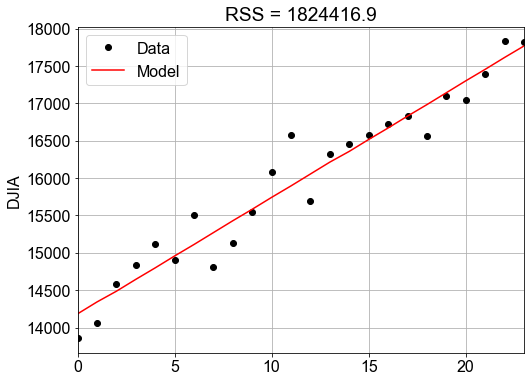

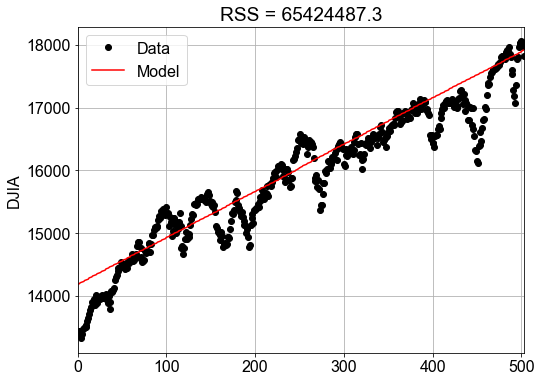

In [34]:
# build and fit a model to the df_monthly data
model_fit = ols('Close ~ DayCount', data=df_monthly).fit()

# Use the model FIT to the MONTHLY data to make a predictions for both monthly and daily data
df_monthly['Model'] = model_fit.predict(df_monthly.DayCount)
df_daily['Model'] = model_fit.predict(df_daily.DayCount)

# Plot the monthly and daily data and model, compare the RSS values seen on the figures
fig_monthly = plot_model_with_data(df_monthly)
fig_daily = plot_model_with_data(df_daily)

In [37]:
x_data = np.array([-10. ,  -9.5,  -9. ,  -8.5,  -8. ,  -7.5,  -7. ,  -6.5,  -6. ,
        -5.5,  -5. ,  -4.5,  -4. ,  -3.5,  -3. ,  -2.5,  -2. ,  -1.5,
        -1. ,  -0.5,   0. ,   0.5,   1. ,   1.5,   2. ,   2.5,   3. ,
         3.5,   4. ,   4.5,   5. ,   5.5,   6. ,   6.5,   7. ,   7.5,
         8. ,   8.5,   9. ,   9.5,  10. ,  10.5,  11. ,  11.5,  12. ,
        12.5,  13. ,  13.5,  14. ,  14.5,  15. ,  15.5,  16. ,  16.5,
        17. ,  17.5,  18. ,  18.5,  19. ,  19.5,  20. ])

y_data = np.array([  73.33885174,   91.52854842,   41.87555998,  103.06980499,
         77.57108039,   99.70512917,  106.70722978,  128.26034956,
        117.88171452,  136.65021987,   82.60474807,   86.82566796,
        122.477045  ,  114.41893877,  127.63451229,  143.2255083 ,
        136.61217437,  154.76845765,  182.39147012,  122.51909166,
        161.78587909,  132.72560763,  210.81767421,  179.6837026 ,
        181.98528167,  234.67907351,  246.48971034,  221.58691239,
        250.3924093 ,  206.43287615,  303.75089312,  312.29865056,
        323.8331032 ,  261.9686295 ,  316.64806585,  337.55295912,
        360.13633529,  369.72729852,  408.0289548 ,  348.82736117,
        394.93384188,  366.03460828,  374.7693763 ,  371.26981466,
        377.88763074,  320.70120977,  336.82269401,  262.00816122,
        290.35612838,  308.90807157,  259.98783618,  265.86978322,
        271.12330621,  258.58229827,  241.52677418,  204.38155251,
        198.05166573,  174.36397174,  190.97570971,  217.20785477,
        146.83883158])

y_model = np.array([-100. ,  -87.5,  -75. ,  -62.5,  -50. ,  -37.5,  -25. ,  -12.5,
          0. ,   12.5,   25. ,   37.5,   50. ,   62.5,   75. ,   87.5,
        100. ,  112.5,  125. ,  137.5,  150. ,  162.5,  175. ,  187.5,
        200. ,  212.5,  225. ,  237.5,  250. ,  262.5,  275. ,  287.5,
        300. ,  312.5,  325. ,  337.5,  350. ,  362.5,  375. ,  387.5,
        400. ,  412.5,  425. ,  437.5,  450. ,  462.5,  475. ,  487.5,
        500. ,  512.5,  525. ,  537.5,  550. ,  562.5,  575. ,  587.5,
        600. ,  612.5,  625. ,  637.5,  650. ])

def plot_data_model_tolerance(x_data, y_data, y_model, tolerance=100):
    """
    Purpose: 
        Plot data (x_data, y_data) and overplot model (x_data, y_model)
    Args:
        x_data (np.array): numpy array of values of independent variable
        y_data (np.array): numpy array of values of dependent variable
        y_model (np.array): numpy array of values of the modeled dependent variable
        tolerance (float): for plotting when np.abs(y_model - y_data) < tolerance
    Returns:
        fig (matplotlib.figure): matplotlib figure object
    """
    residuals = np.abs(y_model - y_data)
    x_good = x_data[residuals < tolerance]
    y_good = y_model[residuals < tolerance]
    x_min = np.min( x_good )
    x_max = np.max( x_good )
    font_options = {'family': 'Arial', 'size': 16}
    plt.rc('font', **font_options)
    fig, axis = plt.subplots(figsize=(8,6))
    x = x_data
    y = y_data
    axis.plot(x[(x>=0) & (x<=10)], y[(x>=0) & (x<=10)], color="black", linestyle=" ", marker="o")
    axis.plot(x[x>10], y[x>10], color="blue", linestyle=" ", marker="o")
    axis.plot(x[x<0], y[x<0], color="blue", linestyle=" ", marker="o")
    axis.plot(x_data, y_model, color="red")
    axis.grid(True, which="both")
    axis.axhline(0, color="black")
    axis.axvline(0, color="black")
    axis.set_ylim([-5*50, 15*50])
    axis.set_xlim([-15, 25])
    axis.xaxis.set_major_locator(MultipleLocator(5.0))
    axis.xaxis.set_minor_locator(MultipleLocator(1.0))
    axis.yaxis.set_major_locator(MultipleLocator(5.0*50))
    axis.yaxis.set_minor_locator(MultipleLocator(1.0*50))
    axis.set_ylabel('Altitude (meters)')
    axis.set_xlabel('Step Distance (Kilometers)')
    axis.set_title("Hiking  Trip")
    style_options = dict(color="green", alpha=0.35, linewidth=8)
    line = axis.plot(x_good, y_good, **style_options)
    plt.show()
    return fig

Minimum good x value = -5.0
Maximum good x value = 12.0


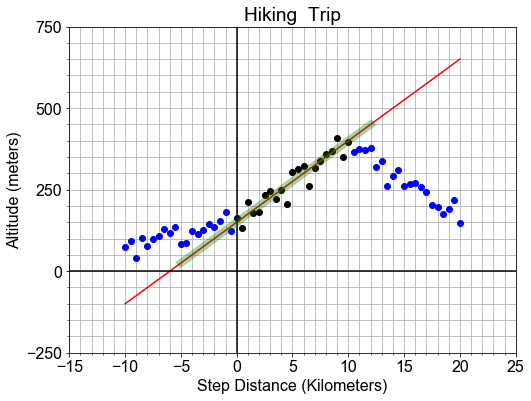

In [39]:
# Compute the residuals, "data - model", and determine where [residuals < tolerance]
residuals = np.abs(y_model - y_data)
tolerance = 100
x_good = x_data[residuals < tolerance]

# Find the min and max of the "good" values, and plot y_data, y_model, and the tolerance range
print('Minimum good x value = {}'.format(np.min(x_good)))
print('Maximum good x value = {}'.format(np.max(x_good)))
fig = plot_data_model_tolerance(x_data, y_data, y_model, tolerance)

In [51]:
def model_fit_and_predict(x, y):
    a0=150
    a1=25
    ym = a0 + (a1*x)
    return ym

y_data = np.array([ 161.78587909,  132.72560763,  210.81767421,  179.6837026 ,
        181.98528167,  234.67907351,  246.48971034,  221.58691239,
        250.3924093 ,  206.43287615,  303.75089312,  312.29865056,
        323.8331032 ,  261.9686295 ,  316.64806585,  337.55295912,
        360.13633529,  369.72729852,  408.0289548 ,  348.82736117,
        394.93384188])

x_data = np.array([  0. ,   0.5,   1. ,   1.5,   2. ,   2.5,   3. ,   3.5,   4. ,
         4.5,   5. ,   5.5,   6. ,   6.5,   7. ,   7.5,   8. ,   8.5,
         9. ,   9.5,  10. ])

y_model = np.array([ 150. ,  162.5,  175. ,  187.5,  200. ,  212.5,  225. ,  237.5,
        250. ,  262.5,  275. ,  287.5,  300. ,  312.5,  325. ,  337.5,
        350. ,  362.5,  375. ,  387.5,  400. ])


In [52]:
# Build the model and compute the residuals "model - data"
y_model = model_fit_and_predict(x_data, y_data)
residuals = y_model - y_data

# Compute the RSS, MSE, and RMSE and print the results
RSS = np.sum(np.square(residuals))
MSE = RSS/len(residuals)
RMSE = np.sqrt(MSE)
print('RMSE = {:0.2f}, MSE = {:0.2f}, RSS = {:0.2f}'.format(RMSE, MSE, RSS))

RMSE = 26.23, MSE = 687.83, RSS = 14444.48


In [54]:
# Compute the residuals and the deviations
residuals = y_model - y_data
deviations = np.mean(y_data) - y_data

# Compute the variance of the residuals and deviations
var_residuals = np.mean(np.square(residuals))
var_deviations = np.mean(np.square(deviations))

# Compute r_squared as 1 - the ratio of RSS/Variance
r_squared = 1 - (var_residuals / var_deviations)
print('R-squared is {:0.2f}'.format(r_squared))

R-squared is 0.89


In [56]:
x_data = np.array([ 0.        ,  0.08333333,  0.16666667,  0.25      ,  0.33333333,
        0.41666667,  0.5       ,  0.58333333,  0.66666667,  0.75      ,
        0.83333333,  0.91666667,  1.        ,  1.08333333,  1.16666667,
        1.25      ,  1.33333333,  1.41666667,  1.5       ,  1.58333333,
        1.66666667,  1.75      ,  1.83333333,  1.91666667,  2.        ])

y_data = np.array([   4.87303609,    2.33139743,    6.74881808,    9.28109413,
         19.26288955,   13.92871724,   30.23443529,   26.88304596,
         34.29045062,   36.75188887,   46.05299048,   39.6529112 ,
         49.03274839,   53.0145036 ,   61.73464166,   59.2003262 ,
         66.14938204,   68.19975808,   75.12664124,   80.91511231,
         80.0314758 ,   90.93417113,   94.37143883,   97.34081635,
        102.70256785])

In [57]:
# Store x_data and y_data, as times and distances, in df, and use ols() to fit a model to it.
df = pd.DataFrame(dict(times=x_data, distances=y_data))
model_fit = ols(formula="distances ~ times", data=df).fit()

# Extact the model parameters and their uncertainties
a0 = model_fit.params['Intercept']
e0 = model_fit.bse['Intercept']
a1 = model_fit.params['times']
e1 = model_fit.bse['times']

# Print the results with more meaningful names
print('Estimate    of the intercept = {:0.2f}'.format(a0))
print('Uncertainty of the intercept = {:0.2f}'.format(e0))
print('Estimate    of the slope = {:0.2f}'.format(a1))
print('Uncertainty of the slope = {:0.2f}'.format(e1))

Estimate    of the intercept = -0.81
Uncertainty of the intercept = 1.29
Estimate    of the slope = 50.78
Uncertainty of the slope = 1.11


In [59]:
df_str = ',distances1,distances2,times\n0,16.243453636632417,16.243453636632417,0.0\n1,-1.9508974698340875,-5.2842308031674206,0.08333333333333333\n2,3.0516158106987756,-3.61505085596789,0.16666666666666666\n3,1.770313778438295,-8.229686221561705,0.25\n4,25.32074295991345,11.987409626580117,0.3333333333333333\n5,-2.1820536354694937,-18.848720302136158,0.41666666666666663\n6,42.4481176421648,22.4481176421648,0.5\n7,21.554597657715636,-1.7787356756176962,0.5833333333333333\n8,36.523724293904316,9.857057627237651,0.6666666666666666\n9,35.0062962452259,5.006296245225899,0.75\n10,56.287746037116406,22.954412703783074,0.8333333333333333\n11,25.231926238356788,-11.434740428309874,0.9166666666666666\n12,46.77582795986493,6.775827959864925,1.0\n13,50.326123119982505,6.992789786649176,1.0833333333333333\n14,69.6710277566877,23.00436109002104,1.1666666666666665\n15,51.50108732685969,1.5010873268596914,1.25\n16,64.9423845911623,11.609051257828975,1.3333333333333333\n17,62.05474915411961,5.388082487452946,1.4166666666666665\n18,75.42213746715593,15.422137467155927,1.5\n19,84.99481880382488,21.661485470491556,1.5833333333333333\n20,72.32714156120412,5.660474894537451,1.6666666666666665\n21,98.94723709839614,28.94723709839614,1.75\n22,100.68257387259462,27.349240539261288,1.8333333333333333\n23,100.85827672235202,24.191610055685345,1.9166666666666665\n24,109.00855949264411,29.008559492644117,2.0\n'
df = pd.read_csv(StringIO(df_str), index_col=0)
df.head()

,distances1,distances2,times
0,16.243454,16.243454,0.000000
1,-1.950897,-5.284231,0.083333
2,3.051616,-3.615051,0.166667
3,1.770314,-8.229686,0.250000
4,25.320743,11.987410,0.333333


In [60]:
# Build and fit two models, for columns distances1 and distances2 in df
model_1 = ols(formula="distances1 ~ times", data=df).fit()
model_2 = ols(formula="distances2 ~ times", data=df).fit()

# Extract R-squared for each model, and the standard error for each slope
se_1 = model_1.bse['times']
se_2 = model_2.bse['times']
rsquared_1 = model_1.rsquared
rsquared_2 = model_2.rsquared

# Print the results
print('Model 1: SE = {:0.3f}, R-squared = {:0.3f}'.format(se_1, rsquared_1))
print('Model 2: SE = {:0.3f}, R-squared = {:0.3f}'.format(se_2, rsquared_2))

Model 1: SE = 3.694, R-squared = 0.898
Model 2: SE = 3.694, R-squared = 0.335
